<a href="https://colab.research.google.com/github/meridethfrey/ResonanceCourse/blob/master/ExampleDataAnalysis/FittingFreeDecay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fitting Free Decay Data
Save a copy of this to your own Google Drive, edit your copy, and share your edited version with Merideth (meri.frey@gmail.com) by **noon on Monday** to submit your assignment.

Before completing this assignment, it is assumed you have worked through:
- [03_Introduction_to_Curve_Fitting.ipynb](https://colab.research.google.com/drive/11rUJc8iYBY8QiJHWcbyXtXT79R62O1Of)


In [0]:
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.stats
import scipy.optimize # we'll use this now
%matplotlib inline

##Assignment 3 - Question 2
Here you will be analyzing some decaying free vibration data acquired during class with the single spring system ($k \approx 2.92 \pm 0.02$ N/m and $M = 0.0792$ kg). I have taken this data and formatted it nicely and saved it in 'FreeDecay.csv' (found in the 'Assignment' folder in the shared CoLab folder). You will need to download the file to your computer, and then upload the file to your personal copy of this Google Colaboratory notebook using the folder icon 'Files' on the left side of the CoLab frame.

In the code cell below...
*   Read in your data file using `np.loadtxt()`
*   Fit data set using the `scipy.optimize.curve_fit` function and the model curve defined below. *Note: you may have to make your own initial parameter values to get a good fit.*
*   Plot the results (both the experimental data and the line of best fit).
*   Determine the frequency `f` and the decay time constant `tau` for this data, along with their uncertainties. 

In [0]:
def free_decay_model(t, A, f, tau):
    '''
    Model function for a decaying sinusoidal function with respect to t
    A = amplitude
    f = frequency of oscillation (in Hertz)
    tau = time constant
    '''
    return A*np.exp(-t/tau)*np.cos(2*np.pi*f*t)

In [0]:
t, x = np.loadtxt('FreeDecay.csv', delimiter=',', unpack=True, skiprows=1)

best-fit parameters:  [146.33889355   0.89675135   2.55732987]
uncertainties:  [4.64566408e+00 2.16165269e-03 1.21063969e-01]
A =  146.33889354623523  +/-  4.64566407590869
f =  0.8967513542248148  +/-  0.002161652685290791
tau =  2.5573298685267347  +/-  0.12106396858743956


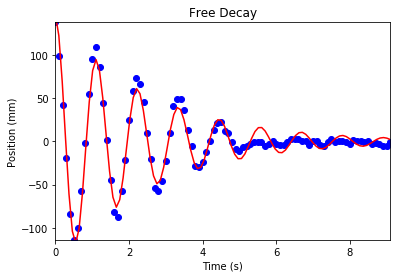

In [0]:
guess = np.array([150., 1., 3.])
popt, pcov = scipy.optimize.curve_fit(free_decay_model, t, x, p0=guess)
print('best-fit parameters: ', popt)

popt_uncertainties = np.sqrt(np.diag(pcov)) # get the diagonal elements then take sqrt
print('uncertainties: ', popt_uncertainties)

# calculate best fit model values
xfit = np.linspace(0, t.max(), 100)
yfit = free_decay_model(xfit, popt[0], popt[1], popt[2])
#yfit = free_decay_model(xfit, guess[0],guess[1],guess[2])

# plot
plt.plot(t, x, 'bo')
plt.plot(xfit, yfit, 'r') # plot with a solid line
plt.xlim(t.min(),t.max())
plt.ylim(x.min(),x.max())
plt.xlabel('Time (s)')
plt.ylabel('Position (mm)')
plt.title('Free Decay')

print('A = ', popt[0], ' +/- ', popt_uncertainties[0])
print('f = ', popt[1], ' +/- ', popt_uncertainties[1])
print('tau = ', popt[2], ' +/- ', popt_uncertainties[2])

Theory gives $$\omega = \sqrt{\omega_0^2 - \frac{\gamma^2}{4}}$$ where $\omega_0^2 = k/m$ and $\tau = 2/\gamma$.

In [0]:
k = 2.92 #N/m
m = 0.0792 #kg
tau = 2.56 #s
f = np.sqrt(k/m - 1/tau**2)/(2*np.pi) #Hertz
print("Theory f = ", f)
print("Theory f0 = ", np.sqrt(k/m)/(2*np.pi))

Theory f =  0.9643804497171302
Theory f0 =  0.9663822992059184


Do get smaller frequency than the natural frequency, using the measured spring constant and mass, but not matching theory within uncertainty. Looks like probably systematic error in the data not quite matching the model. The amplitude envelope does not really follow a nice exponential decay (almost a linear decay instead), which hints that perhaps the friction in this system isn't primarily dependent linearly on velocity.

Probably instead more of a constant frictional force, see [this paper](https://aapt.scitation.org/doi/10.1119/1.5044654) if you want to explore this further!